## Modeling

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
data = pd.read_csv('../data/data3.csv')

In [37]:
data.head()

,house_style-split_level_VS_split_foyer,house_style-story_1_VS_split_level,house_style-story_1_half_unfin_VS_story_1,house_style-story_1_half_fin_VS_story_1_half_unfin,house_style-story_2_VS_story_1_half_fin,house_style-story_2_half_unfin_VS_story_2,house_style-story_2_half_fin_VS_story_2_half_unfin,heating-GasW_VS_GasA,heating-Grav_VS_GasW,heating-Wall_VS_Grav,...,kitchen_abvgr,totrms_abvgrd,fireplaces,wood_deck_sf,heating_qc,bsmtfin_sf_1,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath,saleprice
0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.8,-0.6,-0.4,...,-0.199992,-0.278128,-0.931714,-0.750407,0.871767,0.222219,-0.769570,-0.823172,-0.250759,130500
1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.8,-0.6,-0.4,...,-0.199992,1.030746,0.657359,-0.750407,0.871767,0.459688,-0.328274,1.141040,-0.250759,220000
2,0.125,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.8,-0.6,-0.4,...,-0.199992,-0.932564,-0.931714,-0.750407,-1.202315,0.674323,0.009740,1.141040,-0.250759,109000
3,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.8,-0.6,-0.4,...,-0.199992,0.376309,-0.931714,0.065353,-0.165274,-0.994809,-1.570005,-0.823172,-0.250759,174000
4,0.125,0.25,-0.625,-0.5,-0.375,-0.25,-0.125,-0.8,-0.6,-0.4,...,-0.199992,-0.278128,-0.931714,-0.750407,-1.202315,-0.994809,-0.884588,-0.823172,-0.250759,138500


In [38]:
data.shape

(2033, 70)

---

#### Define X and y

In [79]:
X = data.drop(columns=['saleprice'])

In [80]:
# we take the log transformed y
y = data['saleprice']
# y = np.log(data['saleprice']) # using the log-transformed sale price yielded predictions that, when exponentiated,
                                # result in infinity.

---

#### Train-test split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=2/3)

In [82]:
print(X_train.shape)
print(X_test.shape)

(1355, 69)
(678, 69)


---

#### Baseline

In [93]:
baseline_train = np.mean(y_train)
baseline_test = np.mean(y_test)

In [94]:
baseline_train_preds = y_train - baseline_train
baseline_test_preds = y_test - baseline_test

In [96]:
# baseline RMSE
print(mean_squared_error(y_train, baseline_train_preds, squared=False))
print(mean_squared_error(y_test, baseline_test_preds, squared=False))

181085.9660516605
181701.1283185841


In [97]:
# baseline R2 score
print(r2_score(y_train, baseline_train_preds))
print(r2_score(y_test, baseline_test_preds))

-4.0539105815638194
-4.659876738878608


---

#### **Linear Regression** 

In [104]:
lr = LinearRegression().fit(X=X_train, y=y_train)

In [105]:
# predictions for train and test data
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [106]:
# RMSE for train data
print(mean_squared_error(y_train, train_preds))

868329764.5785978


In [107]:
# RMSE for test data
print(mean_squared_error(y_test, test_preds))

948793045.0073746


In [108]:
# score for train data
lr.score(X_train, y_train)

0.8661733356914476

In [109]:
# score for test data
lr.score(X_test, y_test)

0.8373465732493108

---

#### Cross Validation Linear Regression

In [102]:
cvs = cross_val_score(lr, X, y)
cvs

array([ 8.41033119e-01,  8.55300896e-01, -1.15117402e+19, -9.26971883e+20,
        8.39219046e-01])

In [103]:
cvs.mean()

-1.876967246137614e+20

---

#### **Ridge**

In [110]:
# defining a range for possible alpha values
ridge_alphas = np.logspace(0, 3, 1000)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = ridge_alphas, 
                   scoring = 'r2',
                   cv = 5)

# fitting the model with the best alpha
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([   1.        ,    1.00693863,    1.01392541,    1.02096066,
          1.02804473,    1.03517796,    1.04236067,    1.04959323,
          1.05687597,    1.06420924,    1.0715934 ,    1.07902879,
          1.08651577,    1.09405471,    1.10164595,    1.10928986,
          1.11698682,    1.12473718,    1.13254132,    1.1403996 ,
          1.14831241,    1.15628013,    1.16430313,    1.1723818 ,
          1.18051653,    1.1887077 ,    1.1969557 ,    1.20526094,
          1.2136238 ,    1.22204469,    1.230524  ,    1.2...
        829.69585208,  835.45280584,  841.24970497,  847.08682666,
        852.96444997,  858.88285595,  864.84232757,  870.84314977,
        876.88560946,  882.96999555,  889.09659895,  895.2657126 ,
        901.47763145,  907.73265252,  914.03107488,  920.37319966,
        926.75933011,  933.18977157,  939.6648315 ,  946.18481947,
        952.75004724,  959.36082871,  966.01747995,  972.72031925,
        979.46966707,  986.26584613,  993.10918137, 

In [111]:
# best alpha
ridge_cv.alpha_

6.789406812696109

In [112]:
# R2 score
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_test, y_test))

0.866805610345701
0.8391801906968066


In [113]:
# RMSE for train data
ridge_cv_preds_train = ridge_cv.predict(X_train)
mean_squared_error(y_train, ridge_cv_preds_train, squared=False)

29397.742633850834

In [114]:
# RMSE for test data
ridge_cv_preds_test = ridge_cv.predict(X_test)
mean_squared_error(y_test, ridge_cv_preds_test, squared=False)

30628.37170068714

In [137]:
pd.set_option('display.max_rows', 80)
pd.Series(data=ridge_cv.coef_, index=X_train.columns)

house_style-split_level_VS_split_foyer                -7515.946971
house_style-story_1_VS_split_level                     1176.521090
house_style-story_1_half_unfin_VS_story_1              8090.829385
house_style-story_1_half_fin_VS_story_1_half_unfin    -2941.422531
house_style-story_2_VS_story_1_half_fin               -4899.346635
house_style-story_2_half_unfin_VS_story_2              3948.047353
house_style-story_2_half_fin_VS_story_2_half_unfin    -4131.581866
heating-GasW_VS_GasA                                  -5225.789681
heating-Grav_VS_GasW                                  -1408.742849
heating-Wall_VS_Grav                                   3795.061234
heating-OthW_VS_Wall                                  -5963.576875
central_air_VS_no_central_air                          1451.256317
electrical-FuseA_VS_SBrkr                              5985.438800
electrical-FuseF_VS_FuseA                             -1751.571892
electrical-FuseP_VS_FuseF                              4056.00

---

#### **Lasso**

In [115]:
# set up a range for possible alpha values
l_alphas = np.logspace(-3, 0, 1000)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas,
                 cv = 5,
                 max_iter = 5000,
                 tol = 0.015)

# Fit model using best ridge alpha
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.001     , 0.00100694, 0.00101393, 0.00102096, 0.00102804,
       0.00103518, 0.00104236, 0.00104959, 0.00105688, 0.00106421,
       0.00107159, 0.00107903, 0.00108652, 0.00109405, 0.00110165,
       0.00110929, 0.00111699, 0.00112474, 0.00113254, 0.0011404 ,
       0.00114831, 0.00115628, 0.0011643 , 0.00117238, 0.00118052,
       0.00118871, 0.00119696, 0.00120526, 0.00121362, 0.00122204,
       0.001...
       0.79049276, 0.7959777 , 0.8015007 , 0.80706201, 0.81266192,
       0.81830068, 0.82397857, 0.82969585, 0.83545281, 0.8412497 ,
       0.84708683, 0.85296445, 0.85888286, 0.86484233, 0.87084315,
       0.87688561, 0.88297   , 0.8890966 , 0.89526571, 0.90147763,
       0.90773265, 0.91403107, 0.9203732 , 0.92675933, 0.93318977,
       0.93966483, 0.94618482, 0.95275005, 0.95936083, 0.96601748,
       0.97272032, 0.97946967, 0.98626585, 0.99310918, 1.        ]),
        cv=5, max_iter=5000, tol=0.015)

In [116]:
# best alpha
lasso_cv.alpha_

0.24231727942375983

In [121]:
# R2 score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.870085010826267
0.8403838640888341


In [122]:
# RMSE for train data
lasso_cv_preds_train = lasso_cv.predict(X_train)
mean_squared_error(y_train, lasso_cv_preds_train, squared=False)

29033.583887736986

In [123]:
# RMSE for test data
lasso_cv_preds_test = lasso_cv.predict(X_test)
mean_squared_error(y_test, lasso_cv_preds_test, squared=False)

30513.53572828504

In [124]:
# printing out the coefficients -- those zeroed out by Lasso are variables that do not contribute to the model
# fit and can be excluded

pd.set_option('display.max_rows', 80)
pd.Series(data=lasso_cv.coef_, index=X_train.columns)

house_style-split_level_VS_split_foyer                -11251.926232
house_style-story_1_VS_split_level                      3675.422084
house_style-story_1_half_unfin_VS_story_1               8910.888593
house_style-story_1_half_fin_VS_story_1_half_unfin     -2786.130753
house_style-story_2_VS_story_1_half_fin               -13231.754471
house_style-story_2_half_unfin_VS_story_2              -2278.924802
house_style-story_2_half_fin_VS_story_2_half_unfin      4668.987723
heating-GasW_VS_GasA                                   -7440.093664
heating-Grav_VS_GasW                                  -10918.503841
heating-Wall_VS_Grav                                   18857.975938
heating-OthW_VS_Wall                                  -47386.843878
central_air_VS_no_central_air                           2152.501590
electrical-FuseA_VS_SBrkr                               7190.971881
electrical-FuseF_VS_FuseA                              -3359.240323
electrical-FuseP_VS_FuseF                       

In [125]:
coldrop = [

# drop bsmtfin_type_1 - redundant with bsmt_cond
'bsmtfin_type_1-Unf_VS_no_basement',
'bsmtfin_type_1-LwQ_VS_Unf',
'bsmtfin_type_1-Rec_VS_LwQ',
'bsmtfin_type_1-BLQ_VS_Rec',
'bsmtfin_type_1-ALQ_VS_BLQ',
'bsmtfin_type_1-GLQ_VS_ALQ',

# drop garage_qual - redandant with garage_cond and one comparison resulted as 0
'garage_qual-1_VS_no_garage',
'garage_qual-2_VS_1',
'garage_qual-3_VS_2',
'garage_qual-4_VS_3',
'garage_qual-5_VS_4',

# drop bsmtfin_sf_1 - redundant with total_bsmt_sf
'bsmtfin_sf_1',
    
# these features cannot be easily manipulated / modified by the house owners
'house_style-split_level_VS_split_foyer',
'house_style-story_1_VS_split_level',
'house_style-story_1_half_unfin_VS_story_1',
'house_style-story_1_half_fin_VS_story_1_half_unfin',
'house_style-story_2_VS_story_1_half_fin',
'house_style-story_2_half_unfin_VS_story_2',
'house_style-story_2_half_fin_VS_story_2_half_unfin',
    
# excluding columns so that we can run the model with the Kaggle test data (some features there are slightly different)
'heating-Wall_VS_Grav',
'heating-OthW_VS_Wall',
'bsmt_cond-4_VS_3',
'bsmt_cond-5_VS_4'
]

In [126]:
# drop the parameters that came out as 0 in the Lasso regression
# drop also the parameters of columns that don't make much sense in the context of our goal
X_ss = X.drop(columns = coldrop)
y_ss = y

In [127]:
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y_ss, random_state=42, train_size=2/3)

In [128]:
X_ss_train.shape

(1355, 46)

In [129]:
X_ss_train.columns

Index(['heating-GasW_VS_GasA', 'heating-Grav_VS_GasW',
       'central_air_VS_no_central_air', 'electrical-FuseA_VS_SBrkr',
       'electrical-FuseF_VS_FuseA', 'electrical-FuseP_VS_FuseF',
       'paved_drive-P_VS_N', 'paved_drive-Y_VS_P',
       'garage_finish-Unf_VS_no_garage', 'garage_finish-RFn_VS_Unf',
       'garage_finish-Fin_VS_RFn', 'fence-MnWw_VS_no_fence',
       'fence-GdWo_VS_MnWw', 'fence-MnPrv_VS_GdWo', 'fence-GdPrv_VS_MnPrv',
       'bsmt_cond-1_VS_no_basement', 'bsmt_cond-2_VS_1', 'bsmt_cond-3_VS_2',
       'fireplace_qu-1_VS_no_fireplace', 'fireplace_qu-2_VS_1',
       'fireplace_qu-3_VS_2', 'fireplace_qu-4_VS_3', 'fireplace_qu-5_VS_4',
       'garage_cond-1_VS_no_garage', 'garage_cond-2_VS_1',
       'garage_cond-3_VS_2', 'garage_cond-4_VS_3', 'garage_cond-5_VS_4',
       'pool_VS_no_pool', 'overall_qual', 'overall_cond', 'year_remod/add',
       'exter_qual', 'exter_cond', 'kitchen_qual', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abv

In [130]:
# set up a range for possible alpha values
l_alphas = np.logspace(-3, 0, 1000)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas,
                 cv = 5,
                 max_iter = 5000,
                 tol = 0.015)

# Fit model using best ridge alpha
lasso_cv.fit(X_ss_train, y_ss_train)

LassoCV(alphas=array([0.001     , 0.00100694, 0.00101393, 0.00102096, 0.00102804,
       0.00103518, 0.00104236, 0.00104959, 0.00105688, 0.00106421,
       0.00107159, 0.00107903, 0.00108652, 0.00109405, 0.00110165,
       0.00110929, 0.00111699, 0.00112474, 0.00113254, 0.0011404 ,
       0.00114831, 0.00115628, 0.0011643 , 0.00117238, 0.00118052,
       0.00118871, 0.00119696, 0.00120526, 0.00121362, 0.00122204,
       0.001...
       0.79049276, 0.7959777 , 0.8015007 , 0.80706201, 0.81266192,
       0.81830068, 0.82397857, 0.82969585, 0.83545281, 0.8412497 ,
       0.84708683, 0.85296445, 0.85888286, 0.86484233, 0.87084315,
       0.87688561, 0.88297   , 0.8890966 , 0.89526571, 0.90147763,
       0.90773265, 0.91403107, 0.9203732 , 0.92675933, 0.93318977,
       0.93966483, 0.94618482, 0.95275005, 0.95936083, 0.96601748,
       0.97272032, 0.97946967, 0.98626585, 0.99310918, 1.        ]),
        cv=5, max_iter=5000, tol=0.015)

In [131]:
# best alpha
lasso_cv.alpha_

1.0

In [132]:
# printing out the coefficients -- those zeroed out by Lasso are variables that do not contribute to the model
# fit and can be excluded

pd.set_option('display.max_rows', 80)
pd.Series(data=lasso_cv.coef_, index=X_ss_train.columns)

heating-GasW_VS_GasA              -7732.526777
heating-Grav_VS_GasW              -3365.938848
central_air_VS_no_central_air      2952.693646
electrical-FuseA_VS_SBrkr          5845.572400
electrical-FuseF_VS_FuseA         -2659.307576
electrical-FuseP_VS_FuseF         12336.560272
paved_drive-P_VS_N                -4071.244694
paved_drive-Y_VS_P                  149.334123
garage_finish-Unf_VS_no_garage     3114.890043
garage_finish-RFn_VS_Unf           5096.309329
garage_finish-Fin_VS_RFn           -425.856454
fence-MnWw_VS_no_fence             -585.609913
fence-GdWo_VS_MnWw                -5224.342276
fence-MnPrv_VS_GdWo                5093.204616
fence-GdPrv_VS_MnPrv               8461.766795
bsmt_cond-1_VS_no_basement         7220.736314
bsmt_cond-2_VS_1                  62076.575552
bsmt_cond-3_VS_2                 -66707.606453
fireplace_qu-1_VS_no_fireplace    -9282.357216
fireplace_qu-2_VS_1                2044.974754
fireplace_qu-3_VS_2                1083.736814
fireplace_qu-

In [143]:
# saving the coefficients as a data frame

coef_df = pd.DataFrame({
    'columns' : X_ss_train.columns,
    'coefficients' : lasso_cv.coef_
}).sort_values('coefficients', ascending=False)

coef_df.to_csv('../data/coef_df.csv')

In [133]:
# RMSE for train data
lasso_cv_preds_train = lasso_cv.predict(X_ss_train)
mean_squared_error(y_ss_train, lasso_cv_preds_train, squared=False)

30487.775002320624

In [134]:
# RMSE for test data
lasso_cv_preds_test = lasso_cv.predict(X_ss_test)
mean_squared_error(y_ss_test, lasso_cv_preds_test, squared=False)

31609.755849491023

In [136]:
# R2 scores
print(lasso_cv.score(X_ss_train, y_ss_train))
print(lasso_cv.score(X_ss_test, y_ss_test))

0.8567451195646016
0.8287092118510822


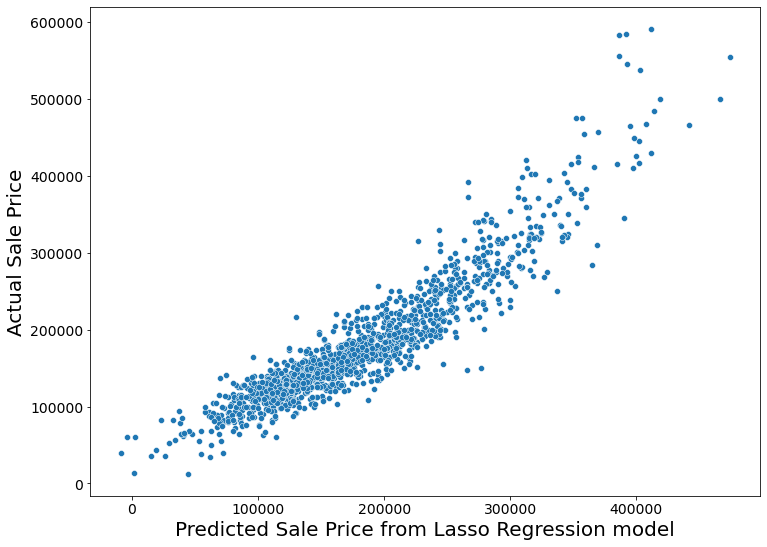

In [76]:
plt.figure(figsize=(12,9))
sns.scatterplot(y=y_ss_train, x=lasso_cv_preds_train);
plt.xlabel('Predicted Sale Price from Lasso Regression model', fontsize=20);
plt.ylabel('Actual Sale Price', fontsize=20);
plt.xticks(size=14);
plt.yticks(size=14);

---

In [99]:
# read test data
test = pd.read_csv('../data/test_df.csv')

In [100]:
test.shape

(878, 67)

In [101]:
test.columns

Index(['id', 'house_style-split_level_VS_split_foyer',
       'house_style-story_1_VS_split_level',
       'house_style-story_1_half_unfin_VS_story_1',
       'house_style-story_1_half_fin_VS_story_1_half_unfin',
       'house_style-story_2_VS_story_1_half_fin',
       'house_style-story_2_half_unfin_VS_story_2',
       'house_style-story_2_half_fin_VS_story_2_half_unfin',
       'heating-GasW_VS_GasA', 'heating-Grav_VS_GasW', 'heating-Floor_VS_Grav',
       'central_air_VS_no_central_air', 'electrical-FuseA_VS_SBrkr',
       'electrical-FuseF_VS_FuseA', 'electrical-FuseP_VS_FuseF',
       'electrical_3', 'paved_drive-P_VS_N', 'paved_drive-Y_VS_P',
       'garage_finish-Unf_VS_no_garage', 'garage_finish-RFn_VS_Unf',
       'garage_finish-Fin_VS_RFn', 'fence-MnWw_VS_no_fence',
       'fence-GdWo_VS_MnWw', 'fence-MnPrv_VS_GdWo', 'fence-GdPrv_VS_MnPrv',
       'bsmtfin_type_1-Unf_VS_no_basement', 'bsmtfin_type_1-LwQ_VS_Unf',
       'bsmtfin_type_1-Rec_VS_LwQ', 'bsmtfin_type_1-BLQ_VS_Rec',

In [102]:
coldrop = [

# drop bsmtfin_type_1 - collinear with bsmt_cond
'bsmtfin_type_1-Unf_VS_no_basement',
'bsmtfin_type_1-LwQ_VS_Unf',
'bsmtfin_type_1-Rec_VS_LwQ',
'bsmtfin_type_1-BLQ_VS_Rec',
'bsmtfin_type_1-ALQ_VS_BLQ',
'bsmtfin_type_1-GLQ_VS_ALQ',

# drop garage_qual - collinear with garage_cond
'garage_qual-1_VS_no_garage',
'garage_qual-2_VS_1',
'garage_qual-3_VS_2',
'garage_qual-4_VS_3',

# drop bsmtfin_sf_1 - collinear with total_bsmt_sf
'bsmtfin_sf_1',
    
# these features cannot be easily manipulated / modified by the house owners
'house_style-split_level_VS_split_foyer',
'house_style-story_1_VS_split_level',
'house_style-story_1_half_unfin_VS_story_1',
'house_style-story_1_half_fin_VS_story_1_half_unfin',
'house_style-story_2_VS_story_1_half_fin',
'house_style-story_2_half_unfin_VS_story_2',
'house_style-story_2_half_fin_VS_story_2_half_unfin',

'electrical_3',
'heating-Floor_VS_Grav',
    
# ID
'id'
]

In [103]:
X = test.drop(columns = coldrop)

In [104]:
X.rename(columns = {'bsmt_cond-2_VS_no_basement' : 'bsmt_cond-1_VS_no_basement',
                   'bsmt_cond-3_VS_2' : 'bsmt_cond-2_VS_1',
                   'bsmt_cond-4_VS_3' : 'bsmt_cond-3_VS_2'}, inplace=True)

In [105]:
X.shape

(878, 46)

In [106]:
len(X_ss_train.columns)

46

In [107]:
len(X.columns)

46

In [108]:
for col in X.columns:
    if col not in X_ss_train:
        print(col)
        print('------')

In [109]:
pd.set_option('display.max_columns', 50)
X.head()

,heating-GasW_VS_GasA,heating-Grav_VS_GasW,central_air_VS_no_central_air,electrical-FuseA_VS_SBrkr,electrical-FuseF_VS_FuseA,electrical-FuseP_VS_FuseF,paved_drive-P_VS_N,paved_drive-Y_VS_P,garage_finish-Unf_VS_no_garage,garage_finish-RFn_VS_Unf,garage_finish-Fin_VS_RFn,fence-MnWw_VS_no_fence,fence-GdWo_VS_MnWw,fence-MnPrv_VS_GdWo,fence-GdPrv_VS_MnPrv,bsmt_cond-1_VS_no_basement,bsmt_cond-2_VS_1,bsmt_cond-3_VS_2,fireplace_qu-1_VS_no_fireplace,fireplace_qu-2_VS_1,fireplace_qu-3_VS_2,fireplace_qu-4_VS_3,fireplace_qu-5_VS_4,garage_cond-1_VS_no_garage,garage_cond-2_VS_1,garage_cond-3_VS_2,garage_cond-4_VS_3,garage_cond-5_VS_4,pool_VS_no_pool,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,kitchen_qual,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,wood_deck_sf,heating_qc,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
0,-0.75,-0.5,-0.5,-0.8,-0.6,-0.4,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.75,-0.5,-0.25,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.036625,2.157251,-1.683931,-0.678056,-2.935812,-2.280707,0.823523,-0.788376,1.349887,4.253806,1.595239,-0.924179,-0.771435,-0.135191,-0.034747,-0.830056,-0.24312
1,-0.75,-0.5,0.5,0.2,-0.6,-0.4,-0.666667,-0.333333,0.25,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.75,-0.5,-0.25,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.767467,-1.388030,-0.362932,-0.678056,-0.228204,-0.755604,0.823523,-0.788376,3.758832,4.253806,2.221914,-0.924179,0.632217,-1.194990,2.257062,-0.830056,-0.24312
2,-0.75,-0.5,0.5,0.2,-0.6,-0.4,-0.666667,-0.333333,0.25,0.5,-0.25,-0.8,-0.6,-0.4,-0.2,0.25,-0.5,-0.25,0.166667,-0.666667,-0.5,-0.333333,-0.166667,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,0.694217,-0.501710,1.055919,1.109731,-0.228204,0.769500,0.823523,1.189322,0.145415,-0.213708,0.341888,0.570166,0.054243,0.924608,-0.920493,1.057998,-0.24312
3,-0.75,-0.5,0.5,0.2,-0.6,-0.4,0.333333,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.75,-0.5,-0.25,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.767467,0.384611,1.055919,1.109731,-0.228204,-0.755604,-0.966213,-0.788376,-1.059058,-0.213708,-0.911463,-0.924179,-0.771435,-1.194990,-0.160590,-0.830056,-0.24312
4,-0.75,-0.5,0.5,0.2,-0.6,-0.4,-0.666667,-0.333333,0.25,0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.75,-0.5,-0.25,0.166667,-0.666667,-0.5,-0.333333,-0.166667,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.036625,-0.501710,-1.047895,-0.678056,-0.228204,-0.755604,-0.966213,1.189322,0.145415,-0.213708,-0.284788,2.064511,-0.771435,-0.135191,0.870361,1.057998,-0.24312


In [110]:
preds = lasso_cv.predict(X)

In [111]:
submit_df = pd.DataFrame(test['id'])

In [113]:
submit_df.rename(columns = {'id' : 'ID'}, inplace=True)

In [114]:
submit_df['SalePrice'] = preds

In [118]:
submit_df.to_csv('../kaggle_submissions/haendler_submission_4.csv', index=False)

---